In [1]:
# Skip this if lme4, lmerTest, MuMIn are already installed

nloptr_url <-"https://cran.r-project.org/src/contrib/Archive/nloptr/nloptr_1.2.1.tar.gz"
install.packages(nloptr_url, repos=NULL, type="source")
mumin_url <- "https://cran.r-project.org/src/contrib/Archive/MuMIn/MuMIn_1.46.0.tar.gz"
install.packages(mumin_url, repos=NULL, type="source")

install.packages("lme4")
install.packages("lmerTest")

also installing the dependencies ‘boot’, ‘minqa’, ‘RcppEigen’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [2]:
library(lme4)
library(lmerTest)
library(MuMIn)

Loading required package: Matrix


Attaching package: ‘lmerTest’


The following object is masked from ‘package:lme4’:

    lmer


The following object is masked from ‘package:stats’:

    step




In [3]:
pid      <- c(1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6, 7, 7, 7, 7, 8, 8, 8, 8, 9, 9, 9, 9, 10, 10, 10, 10, 11, 11, 11, 11, 12, 12, 12, 12, 13, 13, 13, 13, 14, 14, 14, 14, 15, 15, 15, 15, 16, 16, 16, 16)
tid      <- c(2, 6, 1, 5, 6, 7, 5, 8, 5, 2, 6, 1, 4, 8, 3, 7, 7, 6, 2, 4, 4, 1, 6, 8, 6, 2, 4, 7, 1, 4, 2, 3, 3, 8, 5, 1,  3,  1,  4,  2,  8,  4,  1,  6,  5,  7,  3,  2,  2,  5,  7,  3,  1,  3,  8,  5,  7,  5,  8,  6,  8,  3,  7,  4)
order    <- c(1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4,  1,  2,  3,  4,  1,  2,  3,  4,  1,  2,  3,  4,  1,  2,  3,  4,  1,  2,  3,  4,  1,  2,  3,  4,  1,  2,  3,  4)

prior    <- c(1, 0, 2, 2, 1, 2, 2, 3, 2, 3, 0, 3, 2, 2, 1, 1, 1, 0, 1, 1, 2, 2, 1, 1, 0, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 3,  2,  2,  2,  2,  0, 2, 1, 1, 2, 1, 3, 2, 2, 1, 1, 3, 2, 2, 2, 0, 1, 0, 2, 1, 2, 3, 2, 0)
tool     <- c(0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,  0,  1,  0,  1,  0,  1,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  0,  1,  1,  0,  0,  1,  0,  1,  1,  0,  0,  1)

pages    <- c(4, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 3, 4, 5, 1, 2, 2, 6, 4, 1, 1, 2, 1, 1, 4, 2, 4, 4, 2, 1, 1, 2, 2, 2, 1,  1,  1,  1,  1,  1,  2,  2,  2,  4,  1,  1,  2,  3,  4,  6,  2,  1,  1,  1,  3,  3,  1,  4,  5,  2,  1,  5,  3)
queries  <- c(3, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 5, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1,  1,  1,  1,  1,  1,  2,  1,  2,  3,  1,  1,  3,  1,  2,  1,  1,  1,  2,  1,  1,  2,  1,  1,  1,  1,  1,  2,  1)
time     <- c(195, 153, 90, 140, 175, 281, 110, 199, 78, 126, 198, 42, 291, 417, 261, 284, 120, 54, 299, 280, 54, 45, 229, 151, 103, 296, 390, 201, 169, 82, 128, 112, 214, 323, 279, 24, 96, 117, 67, 111, 187, 272, 286, 278, 326, 404, 66, 273, 151, 89, 355, 55, 120, 165, 151, 147, 167, 153, 313, 334, 149, 83, 340, 175)
correct <- c(0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1)

altern   <- c(0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,  0,  1,  0,  1,  0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0)
knewdiff <- c(0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,  0,  1,  0,  1,  0,  1,  1,  1,  1,  0,  1,  0,  1,  1,  1,  1,  1,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1,  0)

df <- data.frame(pid, tid, order, prior, tool, pages, queries, time, correct, altern, knewdiff)

# SOREL User Study
## Tool use vs Task completion time
### No effect of tool use at p=5%, but suggestive at p=10% (longer time when using tool).

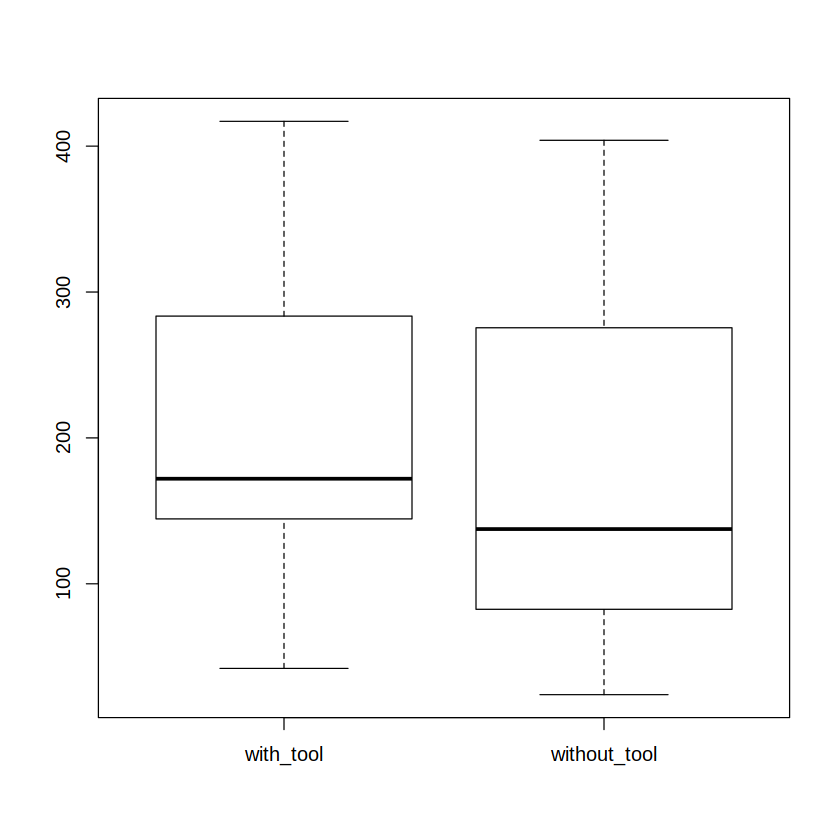

In [4]:
boxplot(list(with_tool=df[df$tool==TRUE,]$time,
             without_tool=df[df$tool==FALSE,]$time))

In [5]:
m1 = lmer(time ~ prior +
                  tool +
               (1|pid) +
               (1|tid),
          data = df,
          REML = FALSE)
summary(m1)

Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: time ~ prior + tool + (1 | pid) + (1 | tid)
   Data: df

     AIC      BIC   logLik deviance df.resid 
   775.1    788.1   -381.5    763.1       58 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.5548 -0.6925 -0.2951  0.6436  1.8273 

Random effects:
 Groups   Name        Variance Std.Dev.
 pid      (Intercept) 1528.2   39.09   
 tid      (Intercept)  829.4   28.80   
 Residual             6993.8   83.63   
Number of obs: 64, groups:  pid, 16; tid, 8

Fixed effects:
            Estimate Std. Error     df t value Pr(>|t|)    
(Intercept)   198.69      30.01  40.29   6.622 6.13e-08 ***
prior         -19.08      14.35  56.37  -1.330   0.1889    
tool           37.97      20.93  43.30   1.815   0.0765 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
      (Intr) prior 
prior -0.732       
tool  -0.317 -0.043

In [6]:
r.squaredGLMM(m1)

Warning message:
“'r.squaredGLMM' now calculates a revised statistic. See the help page.”


R2m,R2c
0.06101367,0.2977395


## Tool use vs Number of pages visited
### No effect of tool use.

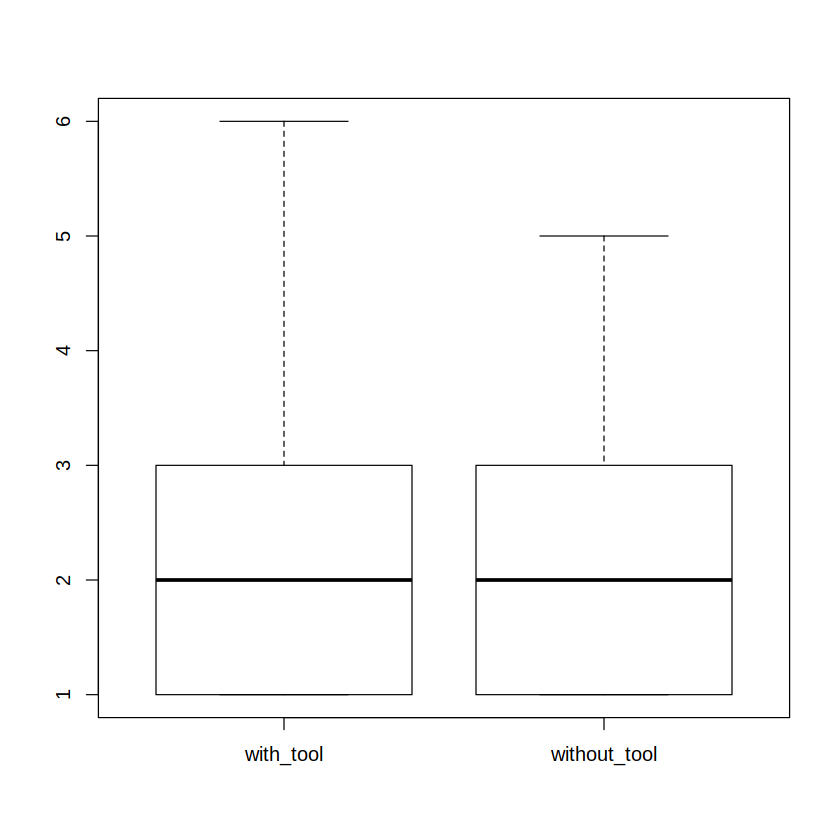

In [7]:
boxplot(list(with_tool=df[df$tool==TRUE,]$pages,
             without_tool=df[df$tool==FALSE,]$pages))

In [8]:
m2 = lmer(pages ~ prior +
                   tool +
                (1|pid) +
                (1|tid),
          data = df,
          REML = FALSE)

summary(m2)

boundary (singular) fit: see help('isSingular')



Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: pages ~ prior + tool + (1 | pid) + (1 | tid)
   Data: df

     AIC      BIC   logLik deviance df.resid 
   231.8    244.8   -109.9    219.8       58 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.5177 -0.6741 -0.1734  0.2902  2.4701 

Random effects:
 Groups   Name        Variance Std.Dev.
 pid      (Intercept) 0.2399   0.4898  
 tid      (Intercept) 0.0000   0.0000  
 Residual             1.6171   1.2717  
Number of obs: 64, groups:  pid, 16; tid, 8

Fixed effects:
            Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)   2.3551     0.3961 60.2049   5.946  1.5e-07 ***
prior        -0.1502     0.1974 61.7763  -0.761    0.450    
tool          0.2281     0.3182 47.3371   0.717    0.477    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
      (Intr) prior 
prior -0.763       
tool  -0.371 -0.03

In [9]:
 r.squaredGLMM(m2)

R2m,R2c
0.01512681,0.1423625


## Tool use vs Number of queries
### No effect of tool use.

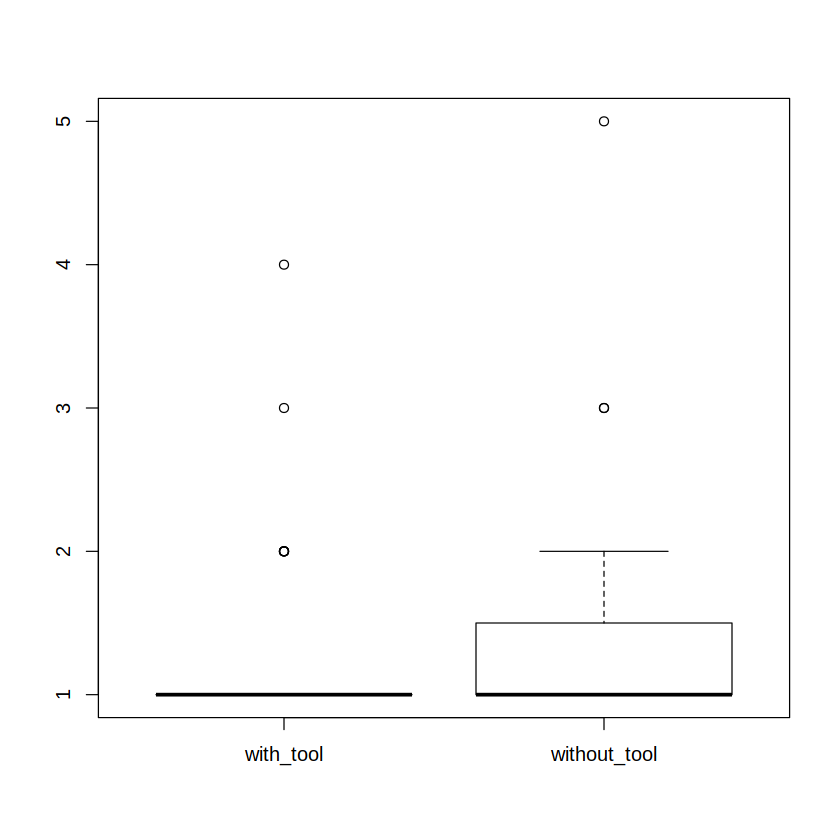

In [10]:
boxplot(list(with_tool=df[df$tool==TRUE,]$queries,
             without_tool=df[df$tool==FALSE,]$queries))

In [11]:
m3 = lmer(queries ~ prior +
                     tool +
                  (1|pid) +
                  (1|tid),
          data = df,
          REML = FALSE)
summary(m3)

Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: queries ~ prior + tool + (1 | pid) + (1 | tid)
   Data: df

     AIC      BIC   logLik deviance df.resid 
   160.1    173.0    -74.0    148.1       58 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.0233 -0.5001 -0.3546 -0.1778  4.3224 

Random effects:
 Groups   Name        Variance Std.Dev.
 pid      (Intercept) 0.05515  0.2348  
 tid      (Intercept) 0.02506  0.1583  
 Residual             0.52179  0.7223  
Number of obs: 64, groups:  pid, 16; tid, 8

Fixed effects:
             Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)  1.414592   0.233764 39.626925   6.051 4.14e-07 ***
prior       -0.005448   0.116384 51.879348  -0.047    0.963    
tool        -0.093410   0.180733 42.411819  -0.517    0.608    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
      (Intr) prior 
prior -0.762       
tool

In [12]:
r.squaredGLMM(m3)

R2m,R2c
0.003729669,0.1364777


## Tool use vs Correctness
### No effect of tool use.

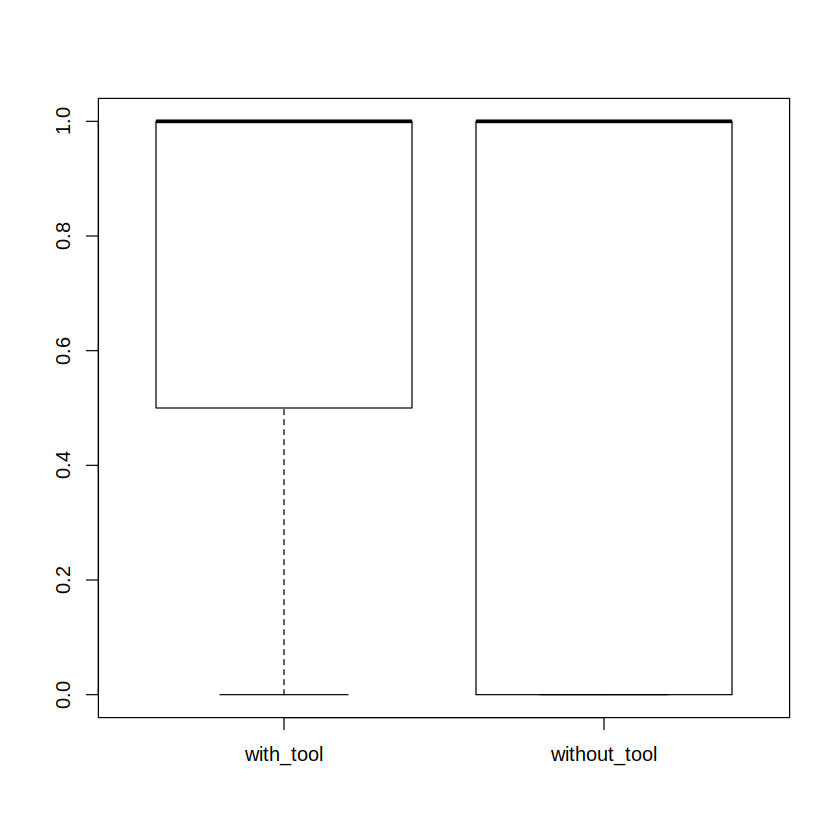

In [13]:
boxplot(list(with_tool=df[df$tool==TRUE,]$correct,
             without_tool=df[df$tool==FALSE,]$correct))

In [14]:
m6 = glmer(correct ~ prior +
                     tool +
                  (1|pid) +
                  (1|tid),
          data = df,
          family = "binomial")
summary(m6)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: correct ~ prior + tool + (1 | pid) + (1 | tid)
   Data: df

     AIC      BIC   logLik deviance df.resid 
    66.2     77.0    -28.1     56.2       59 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.8225 -0.1721  0.1911  0.4019  1.0511 

Random effects:
 Groups Name        Variance Std.Dev.
 pid    (Intercept) 0.4631   0.6805  
 tid    (Intercept) 7.8962   2.8100  
Number of obs: 64, groups:  pid, 16; tid, 8

Fixed effects:
            Estimate Std. Error z value Pr(>|z|)
(Intercept)  -0.2190     1.4989  -0.146    0.884
prior         0.9592     0.6593   1.455    0.146
tool          0.8814     0.8699   1.013    0.311

Correlation of Fixed Effects:
      (Intr) prior 
prior -0.551       
tool  -0.239  0.080

In [15]:
r.squaredGLMM(m6)

Warning message:
“the null model is correct only if all variables used by the original model remain unchanged.”


,R2m,R2c
theoretical,0.07114662,0.7376807
delta,0.06517107,0.6757234


## Tool use vs Awareness of comparative API methods
### Strong effect of tool - people become aware of more API methods.

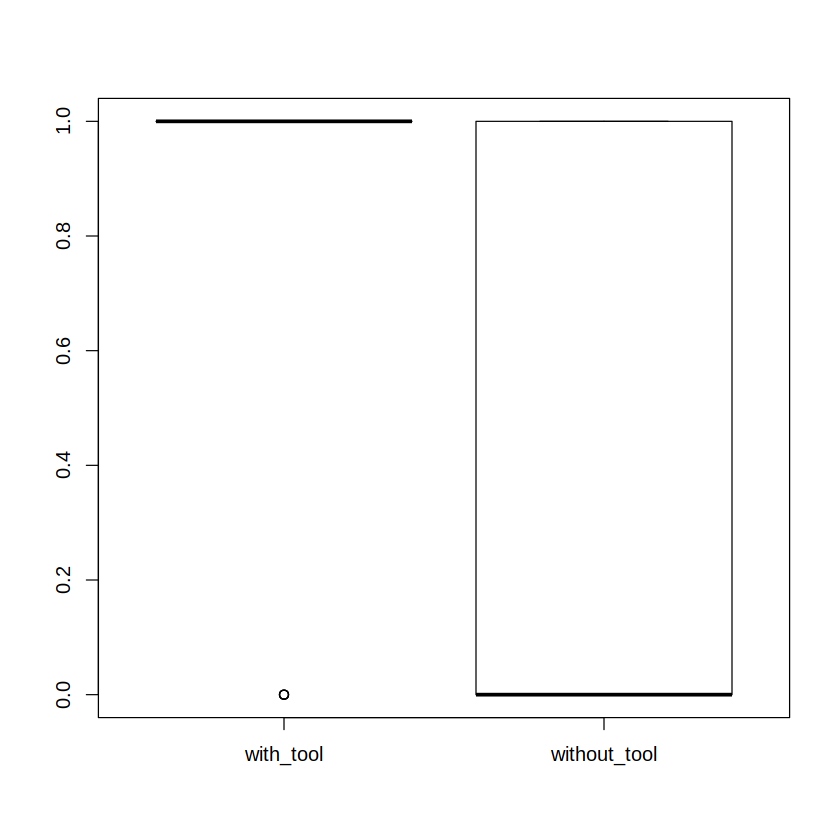

In [16]:
boxplot(list(with_tool=df[df$tool==TRUE,]$altern,
             without_tool=df[df$tool==FALSE,]$altern))

In [17]:
m4 = glmer(altern ~ prior +
                     tool +
                  (1|pid) +
                  (1|tid),
          data = df,
          family = "binomial")
summary(m4)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: altern ~ prior + tool + (1 | pid) + (1 | tid)
   Data: df

     AIC      BIC   logLik deviance df.resid 
    73.7     84.5    -31.9     63.7       59 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.0291 -0.4679  0.2241  0.4370  1.4486 

Random effects:
 Groups Name        Variance Std.Dev.
 pid    (Intercept) 0.2112   0.4595  
 tid    (Intercept) 1.1009   1.0492  
Number of obs: 64, groups:  pid, 16; tid, 8

Fixed effects:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  -1.1170     0.9231  -1.210  0.22622   
prior         0.2989     0.4440   0.673  0.50084   
tool          3.0300     0.9535   3.178  0.00148 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
      (Intr) prior 
prior -0.766       
tool  -0.416  0.128

In [18]:
r.squaredGLMM(m4)

Warning message:
“the null model is correct only if all variables used by the original model remain unchanged.”
boundary (singular) fit: see help('isSingular')



,R2m,R2c
theoretical,0.3451322,0.5318421
delta,0.3029927,0.4669059


## Tool use vs Knowing differences between comparative API methods
### Strong effect of tool - people know differences between the comparative methods better, even controlling for prior knowledge.

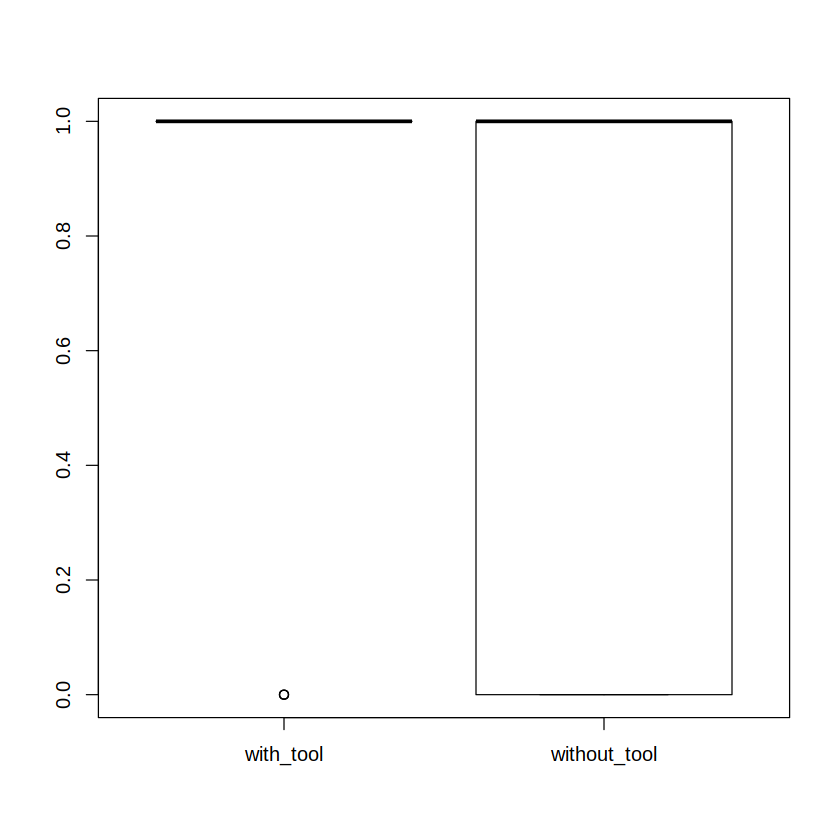

In [19]:
boxplot(list(with_tool=df[df$tool==TRUE,]$knewdiff,
             without_tool=df[df$tool==FALSE,]$knewdiff))

In [20]:
m5 = glmer(knewdiff ~ prior +
                       tool +
                    (1|pid) +
                     (1|tid),
          data = df,
          family = "binomial")
summary(m5)

boundary (singular) fit: see help('isSingular')



Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: knewdiff ~ prior + tool + (1 | pid) + (1 | tid)
   Data: df

     AIC      BIC   logLik deviance df.resid 
    64.8     75.6    -27.4     54.8       59 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-5.2477 -0.0530  0.1906  0.3976  1.5786 

Random effects:
 Groups Name        Variance Std.Dev.
 pid    (Intercept) 0.000    0.000   
 tid    (Intercept) 2.949    1.717   
Number of obs: 64, groups:  pid, 16; tid, 8

Fixed effects:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  -1.0824     1.1006  -0.983  0.32537   
prior         1.1124     0.5781   1.924  0.05432 . 
tool          2.6348     0.9505   2.772  0.00557 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
      (Intr) prior 
prior -0.710       
tool  -0.379  0.312
optimizer (Nelder_Mead) convergence code: 0 (OK)
boundar

In [21]:
r.squaredGLMM(m5)

Warning message:
“the null model is correct only if all variables used by the original model remain unchanged.”
boundary (singular) fit: see help('isSingular')



,R2m,R2c
theoretical,0.3062894,0.6342102
delta,0.2495086,0.5166384
